In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
data = pd.read_csv("data.csv")
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [16]:
169909 * (1/3)

56636.33333333333

In [9]:
data['top25'] = data['popularity'] > 50
print("There are", len(data.loc[data['top25'] == True]), 
      'observations that have "popularity" above 50.')
data["top25"]

There are 35858 observations that have "popularity" above 50.


0         False
1         False
2         False
3         False
4         False
          ...  
169904     True
169905     True
169906     True
169907     True
169908     True
Name: top25, Length: 169909, dtype: bool

In [10]:
x = data[data.corr().columns].drop(['popularity','top25','year','explicit'], axis=1)
y = data['top25'] 

In [21]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 200, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76) 
    result = np.mean(cross_val_score(forest, x, y, cv=3))
    results.append(result) 
    print(n, ':', result)

1 : 0.7499191373719962
4 : 0.8041893910633618
5 : 0.8005992577410178
8 : 0.8123997076129621
10 : 0.8152541778792384
20 : 0.8201332844605885
50 : 0.8237999872447102
75 : 0.8248005237264269
100 : 0.8248299492344233
200 : 0.8258658010228599
500 : 0.8260247089916382


Text(0.5, 0, 'Number of Trees in Random Forest Model')

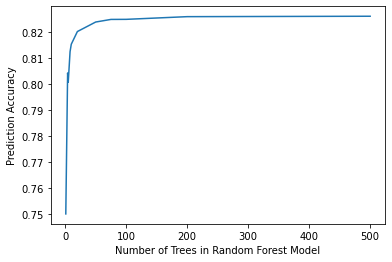

In [22]:
plt.plot(n_estimators_array, results)
plt.ylabel("Prediction Accuracy")
plt.xlabel("Number of Trees in Random Forest Model")

In [11]:
from sklearn.model_selection import RandomizedSearchCV

# Number of features to consider at every split
max_features = ['sqrt', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['sqrt', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=76)

In [15]:
import time

start = time.time()

rf = RandomForestClassifier(n_estimators=75)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=76)
# Fit the random search model
rf_random.fit(x_train, y_train)

end = time.time()

In [17]:
print("Random Forest Automated Hyperparameter tuning took:", int((end - start)/60), "minutes and",
     int((((end - start)/60)-int((end - start)/60)) * 60), "seconds")

Random Forest Automated Hyperparameter tuning took: 96 minutes and 56 seconds


In [18]:
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 70}

In [19]:
forest_best = RandomForestClassifier(n_estimators=75, min_samples_leaf= 4, max_features= 'log2', max_depth = 70)
forest_best.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=70, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
forestPredictions = forest_best.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[42340  2394]
 [ 7117  4786]]
              precision    recall  f1-score   support

       False       0.86      0.95      0.90     44734
        True       0.67      0.40      0.50     11903

    accuracy                           0.83     56637
   macro avg       0.76      0.67      0.70     56637
weighted avg       0.82      0.83      0.82     56637



loudness            0.194227
acousticness        0.116047
energy              0.105000
valence             0.098694
danceability        0.092836
duration_ms         0.087755
instrumentalness    0.070620
speechiness         0.070148
tempo               0.063707
liveness            0.062743
key                 0.031134
mode                0.007090
dtype: float64


<AxesSubplot:>

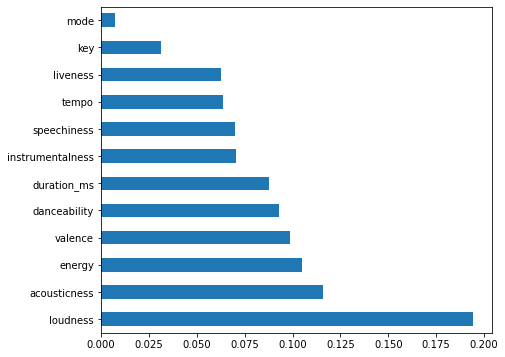

In [21]:
feature_importances = pd.Series(forest_best.feature_importances_, index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)
feature_importances.plot(kind='barh', figsize=(7,6))